In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB
None


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['Hour'] = data['date'].dt.hour
data['Day'] = data['date'].dt.day
data['DayOfWeek'] = data['date'].dt.dayofweek
data['Month'] = data['date'].dt.month

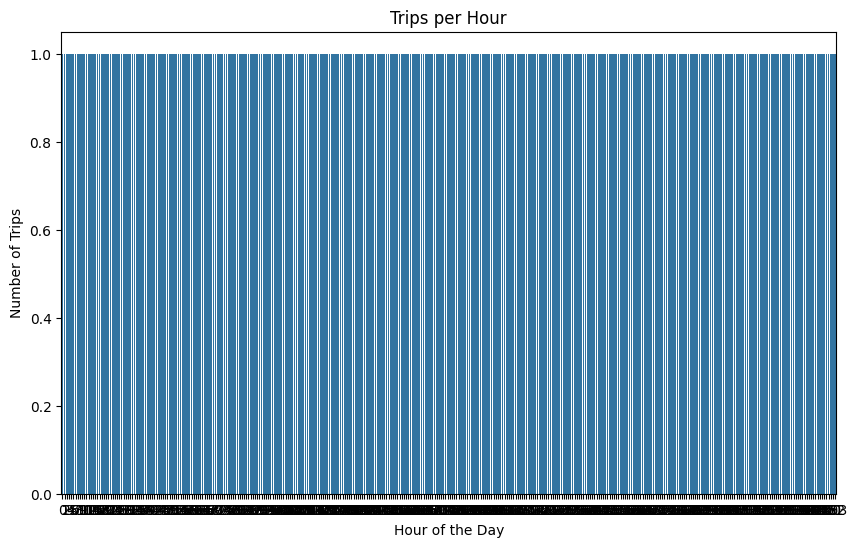

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['Hour'])
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

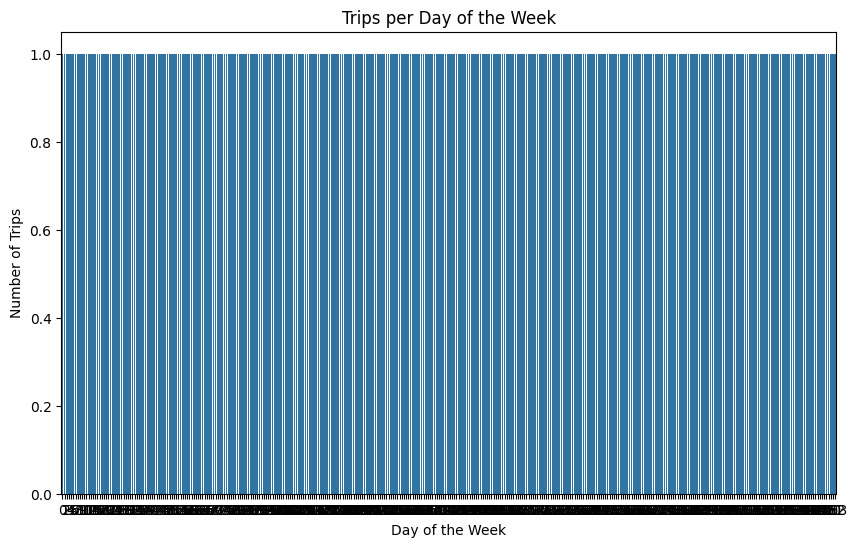

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(data['DayOfWeek'])
plt.title('Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=['dispatching_base_number'], drop_first=True)

In [ ]:
X = data[['Hour', 'Day', 'DayOfWeek', 'Month', 'active_vehicles', 'dispatching_base_number_B02598', 'dispatching_base_number_B02617', 'dispatching_base_number_B02682', 'dispatching_base_number_B02764', 'dispatching_base_number_B02765']]
y = data['trips']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1549821.3880738318
R^2 Score: 0.9871076130883429


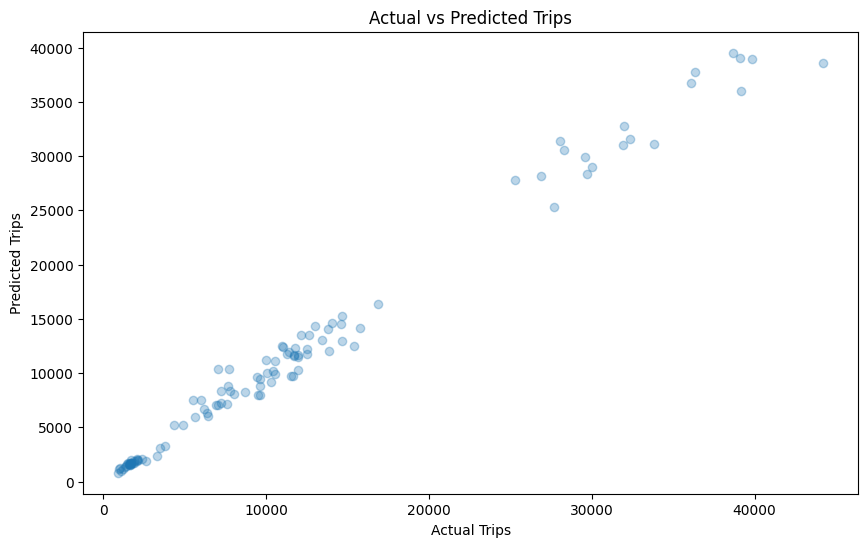

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()